# QLearning_breakout1

We train an agent to play a simple version of Breakout. There are 25 bricks in 5 rows and 5 columns. At each time, the agent can take one of 5 actions to remove the bottom brick in one of 5 columns. Unlike the original Breakout, there is no ball and thus you don't need to worry about losing a ball. A reward of 1 is given for removing a brick.
![](./image/environment1.png)
Figure. Example of state transition in environment 1. <br>
In environment 1, if any one of 5 columns is cleared, then all the remaining bricks are removed and you get a reward equal to the number of removed bricks. Therefore, an optimal policy for this environment is to clear any one of 5 columns. 

In [1]:
# EE488C Special Topics in EE <Deep Learning and AlphaGo>, Fall 2016
# Information Theory & Machine Learning Lab, School of EE, KAIST
# Wonseok Jeon and Sungik Choi (wonsjeon@kaist.ac.kr, si_choi@kaist.ac.kr)
# written on 2016/11/23

import numpy as np
import time
import os
import matplotlib.pyplot as plt
from project2_environment import environment1 as environment
from project2_state_representation import scalar_state

* It performs Q-learning to train an agent to play Breakout environment#1.
* Epsilon-greedy exploration is used, where the value of epsilon is set to 1 for the first episode and then decreased linearly to 0 for the last episode.
* The number of episodes is set to 10,000. For the i-th episode, 'num_trials[i]' is set to the number of actions taken during the episode. 
* 

In [ ]:
# First, set the parameters
num_rows = 5
num_columns = 5
num_states = 6**5
num_actions = 5
num_episodes = 10000
alpha = 0.1
gamma = 0.9
Q = np.zeros([num_states, num_actions])
num_trials = np.zeros([num_episodes])

At the end of training, it will show the number of actions taken for the last episode, i.e., ‘num_trials[n_episodes-1]’. Since 𝜖𝜖=0 for the last episode, it measures the performance of the learned agent without any random exploration. If training is done well, the number of actions taken for the last episode should be 5. Due to randomness, i.e., random explorations during training, this may be higher than 5 sometimes. In that case, try to run the code again until you get 5.

Number of time steps at the end of training:  5.0


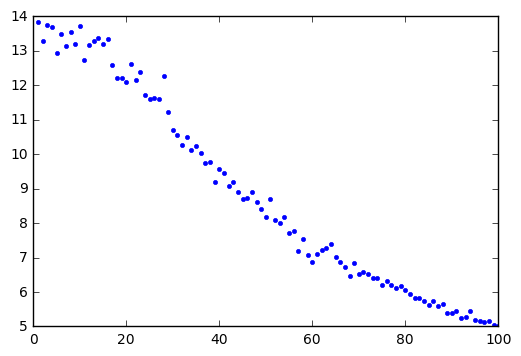

In [2]:
for i_episode in range(num_episodes):
    S = [5, 5, 5, 5, 5]; Ss = scalar_state(S)
    epsilon = 1.0 - float(i_episode) / float(num_episodes - 1) # decreased linearly from 1 to 0
    for epoch in range(10000):
        if np.random.random() < epsilon:  # random exploration with prob. epsilon
            A = int(np.random.randint(0, 5))
        else:  # greedy action with random tie break
            maxQ = np.max(Q[Ss]) 
            A = int(np.random.choice(np.argwhere(Q[Ss] == maxQ).flatten()))
        R, Sn, T = environment(S, A)  # Observe the outputs of the state transition
        Q[Ss, A] = (1 - alpha) * Q[Ss, A] + alpha * (
            R + gamma * np.max(Q[scalar_state(Sn)]))  # Perform Q learning
        if T == 1:  # If terminal state
            num_trials[i_episode] = epoch + 1
            break
        S = Sn

# Print the number of trials
print "Number of time steps at the end of training: ", num_trials[num_episodes - 1]
# Plot the average number of time steps 
# Each data point is an average over (num_episodes / 100) episodes
Xaxis = np.linspace(1, 100, 100, endpoint = True)
C = np.mean(np.reshape(num_trials, [100, num_episodes / 100]), axis = 1)
plt.plot(Xaxis, C, '.')
plt.show()

It also shows a plot of how the number of actions changes over training episodes. Each data point in the plot shows an average of ‘num_trials’ over (num_episodes/ 100) episodes. In Fig. 6 below, we show an example of the plot.